# LIST 2 - MACHINE LEARNING

Prof: Thiago Curado | Students: Gabriela N. Brogim and Isabella Nascimento



EXERCISE 1 - ADABOOST

In [ ]:
# Core
import pandas as pd
import numpy as np
from scipy.stats import skew

# Visual
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7.5]
import plotly.express as px
import seaborn as sns

# Scikit
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, LassoCV, ElasticNetCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Core
import seaborn as sns
import pandas as pd
import numpy as np
from math import log,exp

# Visual
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)
import graphviz

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

import io 


In [ ]:
#Importing the dataset:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()

Saving train.csv to train.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Dividing into train, test and validation:
#train, test = train_test_split(df, test_size = 0.3, random_state = 7)
#train, val = train_test_split(train, test_size = 0.3, random_state = 7)

In [ ]:
#creating all data with all of them to threat the whole base as one:
#all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
 #                     val.loc[:,'MSSubClass':'SaleCondition'],
  #                    test.loc[:,'MSSubClass':'SaleCondition']))


(A) Creating a function


In [ ]:
#The following code it is what we first thought of doing. But it went wrong...

#Using a basic treatment to create the matrix:

#train["SalePrice"] = np.log1p(train["SalePrice"])
#numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
#all_data = pd.get_dummies(all_data)
#all_data = all_data.fillna(all_data.mean())

#Creating matrixes 
#X_train = all_data[:train.shape[0]]
#X_test = all_data[train.shape[0]:]
#y_train = train.SalePrice
#y_test = test.SalePrice

In [ ]:
#Defining accuracy measures:
#def mape(Y_actual, Y_Predicted):
#    mape = np.mean(np.abs( Y_actual - Y_Predicted)/Y_actual)*100
#    mape = round(mape,2)
#    return mape

In [ ]:
#all_n_estimators = [10, 50, 100, 250, 500, 1000, 5000]
#max_depth = (n_depth)
#mape_list = []
#n_estimators_list = []

In [ ]:
#the first function that failed:
#for n_estimators in all_n_estimators:
#    print('n_estimators', n_estimators )
              
#    ADA = AdaBoostRegressor(
#        n_estimators=n_estimators
#    ).fit(X_train, y_train)
        
#    pred = ADA.predict(X_test)
        
#    accuracy = mape(y_test, np.exp(pred))
        
#    mape_list.append(accuracy)
#    n_estimators_list.append(n_estimators)

# results = pd.DataFrame({
#   'n_estimators': n_estimators_list,
#    'MAPE': mape_list
#})             

In [ ]:
# Our actual option:
## The idea was based on: https://towardsdatascience.com/adaboost-from-scratch-37a936da3d50
df2 = df #for exercise 1.3
df3 = df #for exercise 1.4

#Listing explanatory features

#listing the features used on the adaboost code:
features = ['OverallQual', 'GrLivArea', 'GarageCars']
features_y = ['OverallQual', 'GrLivArea', 'GarageCars', 'SalePrice']
df = df[features_y]

In [ ]:
## Changing the problem for a classification one

df['SalePrice'] = pd.qcut(df['SalePrice'],q = 2, labels = [-1, 1])
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,OverallQual,GrLivArea,GarageCars,SalePrice
0,7,1710,2,1
1,6,1262,2,1
2,7,1786,2,1
3,7,1717,3,-1
4,8,2198,3,1


1 (A) and (B)


In [ ]:
#Steps of the fuctions:

##Computing error

def compute_error (y, y_pred, w_i):
    return (sum(w_i* (np.not_equal(y, y_pred)).astype(int)))/sum(w_i)

## Weights of weak classifiers 

def compute_alpha(error):
    return np.log((1-error) / error)

##Update weights after boosting interaction

def update_weights(w_i, alpha, y, y_pred):
    return w_i* np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))

In [ ]:
# Define AdaBoost for classification:
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []

    def fit(self, X, y, M = 100):
        '''
        Fit model. Arguments:
        X: independent variables - array-like matrix
        y: target variable - array-like vector
        M: number of boosting rounds. Default is 100 - integer
        '''
        
        # Clear before calling
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        # Iterate over M weak classifiers
        for m in range(0, M):
            
            # Set weights for current boosting iteration
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y)  # At m = 0, weights are all the same and equal to 1 / N
            else:
                # (d) Update w_i
                w_i = update_weights(w_i, alpha_m, y, y_pred)
            
            # (a) Fit weak classifier and predict labels
            G_m = DecisionTreeClassifier(max_depth = 1)     # Stump: Two terminal-node classification tree
            G_m.fit(X, y, sample_weight = w_i)
            y_pred = G_m.predict(X)
            
            self.G_M.append(G_m) # Save to list of weak classifiers

            # (b) Compute error
            error_m = compute_error(y, y_pred, w_i)
            self.training_errors.append(error_m)

            # (c) Compute alpha
            alpha_m = compute_alpha(error_m)
            self.alphas.append(alpha_m)

        assert len(self.G_M) == len(self.alphas)

    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred       


#the code was based on: https://towardsdatascience.com/adaboost-from-scratch-37a936da3d50


In [ ]:
## Dividing into train and test:
train, test = train_test_split(df, test_size=0.3, random_state=7)

X_train = df[:train.shape[0]]
X_test = df[train.shape[0]:]
y_train = train.SalePrice
y_test = test.SalePrice

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

def mape(Y_actual, Y_Predicted):
    mape = np.mean(np.abs( Y_actual - Y_Predicted)/Y_actual)*100
    mape = mape.round(2)
    return mape

# Predict

ab = AdaBoost()
ab.fit(X_train, y_train, M = 400)

# Predict on test set
y_pred = ab.predict(X_test)
print('The ROC-AUC score of the model is:', round(roc_auc_score(y_test, y_pred), 4))

The ROC-AUC score of the model is: 0.5084


1(C)

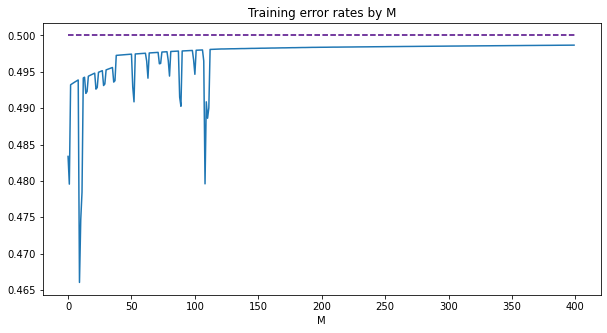

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ab.training_errors)
plt.title('Training error rates by M')
plt.hlines(0.5, 0, 400, colors = 'indigo', linestyles='dashed')
plt.xlabel('M')
plt.show()

2(A) Adding max depth:


In [ ]:
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []
        self.depth = []     #to include max depth, we will create a self.depth here

    def fit(self, X, y, depth = 1, M = 100):
        '''
        Fit model. Arguments:
        X: independent variables - array-like matrix
        y: target variable - array-like vector
        Depth: Max depth with default 1.
        M: number of boosting rounds. Default is 100 - integer
        '''
        
        # Clear before calling
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        # Iterate over M weak classifiers
        for m in range(0, M):
            
            # Set weights for current boosting iteration
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y)  
            else:
                # (d) Update w_i
                w_i = update_weights(w_i, alpha_m, y, y_pred)
            
            # (a) Fit weak classifier and predict labels
            G_m = DecisionTreeClassifier(max_depth = depth)     
            G_m.fit(X, y, sample_weight = w_i)
            y_pred = G_m.predict(X)
            
            self.G_M.append(G_m) 

            # (b) Compute error
            error_m = compute_error(y, y_pred, w_i)
            self.training_errors.append(error_m)

            # (c) Compute alpha
            alpha_m = compute_alpha(error_m)
            self.alphas.append(alpha_m)

        assert len(self.G_M) == len(self.alphas)

    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred      


In [ ]:
# Predict

ab = AdaBoost()
ab.fit(X_train, y_train, depth = 50, M = 400)
y_pred = ab.predict(X_test)
print('The ROC-AUC score of the model is:', round(roc_auc_score(y_test, y_pred), 4))

The ROC-AUC score of the model is: 0.497


(B) Plotting it:

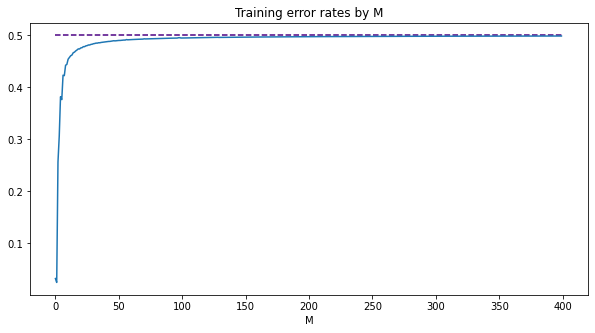

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ab.training_errors)
plt.title('Training error rates by M')
plt.hlines(0.5, 0, 400, colors = 'indigo', linestyles='dashed')
plt.xlabel('M')
plt.show()

The graph above shows us that the training error rates increase significaantly between 0 and 50 M. 

(3) Modifying the function to allow a 3-value classification:

Here, we first tried to change the function where the alpha is replaced by an "i," which equals 3 — trying to make the classification be three objects (which clearly went wrong).

In [ ]:
#class AdaBoost:
  
 #   def __init__(self):
#      self.i = []
#    self.G_M = []
#       self.M = None
#        self.training_errors = []
#        self.prediction_errors = []
#        self.depth = []     

#    def fit(self, X, y, i = 3, depth = 1, M = 100): #change alpha to "i" that is = 3
      #       '''
 #      Fit model. Arguments:
 #       i: 3 
 #       X: independent variables - array-like matrix
 #       y: target variable - array-like vector
 #       Depth: Max depth with default 1.
 #       M: number of boosting rounds. Default is 100 - integer
 #       '''
        
        # Clear before calling
  #      self.i = [] 
  #      self.training_errors = []
  #      self.M = M

        # Iterate over M weak classifiers
#        for m in range(0, M):
            
            # Set weights for current boosting iteration
#            if m == 0:
#                w_i = np.ones(len(y)) * 1 / len(y)  
#            else:
                # (d) Update w_i
#                w_i = update_weights(w_i, alpha_m, y, y_pred)
            
            # (a) Fit weak classifier and predict labels
#            G_m = DecisionTreeClassifier(max_depth = depth)     
#            G_m.fit(X, y, sample_weight = w_i)
#            y_pred = G_m.predict(X)
            
#            self.G_M.append(G_m) 

            # (b) Compute error
 #           error_m = compute_error(y, y_pred, w_i)
#            self.training_errors.append(error_m)

#        assert len(self.G_M) == len(self.i)

#    def predict(self, X):

#        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

 #       for m in range(self.M):
 #           y_pred_m = self.G_M[m].predict(X) * self.i[m]
 #           weak_preds.iloc[:,m] = y_pred_m

 #       y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

 #       return y_pred      


In [ ]:
#ab = AdaBoost()
#ab.fit(X_train, y_train, i, depth = 100, M = 400)
#y_pred = ab.predict(X_test)
#print('The ROC-AUC score of the model is:', round(roc_auc_score(y_test, y_pred), 4))

So, we tried again, but changing other part of our code:

In [ ]:
df2 = df2[features_y]
df2['SalePrice'] = pd.qcut(df2['SalePrice'], q = 3, labels = [1, 2, 3]) #here we tried by changing q 
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,OverallQual,GrLivArea,GarageCars,SalePrice
0,7,1710,2,3
1,6,1262,2,2
2,7,1786,2,3
3,7,1717,3,2
4,8,2198,3,3


In [ ]:
#and here we use the same code from before:
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []
        self.depth = []     #to include max depth, we will create a self.depth here

    def fit(self, X, y, depth = 1, M = 100):
        '''
        Fit model. Arguments:
        X: independent variables - array-like matrix
        y: target variable - array-like vector
        Depth: Max depth with default 1.
        M: number of boosting rounds. Default is 100 - integer
        '''
        
        # Clear before calling
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        # Iterate over M weak classifiers
        for m in range(0, M):
            
            # Set weights for current boosting iteration
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y)  
            else:
                # (d) Update w_i
                w_i = update_weights(w_i, alpha_m, y, y_pred)
            
            # (a) Fit weak classifier and predict labels
            G_m = DecisionTreeClassifier(max_depth = depth)     
            G_m.fit(X, y, sample_weight = w_i)
            y_pred = G_m.predict(X)
            
            self.G_M.append(G_m) 

            # (b) Compute error
            error_m = compute_error(y, y_pred, w_i)
            self.training_errors.append(error_m)

            # (c) Compute alpha
            alpha_m = compute_alpha(error_m)
            self.alphas.append(alpha_m)

        assert len(self.G_M) == len(self.alphas)

    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred 

In [ ]:
# Predict

ab = AdaBoost()
ab.fit(X_train, y_train, depth = 50, M = 200)
y_pred = ab.predict(X_test)
print('The ROC-AUC score of the model is:', round(roc_auc_score(y_test, y_pred), 4))

The ROC-AUC score of the model is: 0.4925


4. Make it work with regressions: 





In [ ]:
from sklearn.tree import DecisionTreeRegressor
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []
        self.depth = None 

    def fit(self, X, y, depth = 1, M = 100):
        '''
        Fit model. Arguments:
        X: independent variables - array-like matrix
        y: target variable - array-like vector
        Depth: Max depth with default 1.
        M: number of boosting rounds. Default is 100 - integer
        '''
        
        # Clear before calling
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        # Iterate over M weak classifiers
        for m in range(0, M):
            
            # Set weights for current boosting iteration
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y)  
            else:
                # (d) Update w_i
                w_i = update_weights(w_i, alpha_m, y, y_pred)
            
            # (a) Fit weak classifier and predict labels
            G_m = DecisionTreeRegressor()  #we change it here!   
            G_m.fit(X, y, sample_weight = w_i)
            y_pred = G_m.predict(X)
            
            self.G_M.append(G_m) 

            # (b) Compute error
            error_m = compute_error(y, y_pred, w_i)
            self.training_errors.append(error_m)

            # (c) Compute alpha
            alpha_m = compute_alpha(error_m)
            self.alphas.append(alpha_m)

        assert len(self.G_M) == len(self.alphas)

    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred 

In [ ]:
df3 = df3[features_y]

In [ ]:
train, test = train_test_split(df3, test_size=0.3, random_state=1)
X_train = train.drop('SalePrice', 1)
X_test = test.drop('SalePrice', 1)
y_train = train['SalePrice'].astype(int)
y_test = test[ 'SalePrice'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
ab = AdaBoost()
ab.fit(X_train, y_train, M = 400)
y_pred = ab.predict(X_test)

## EXERCISE 2 

###I. Download data

In [ ]:
from google.colab import files
uploaded = files.upload()
sloan_survey = pd.read_csv(io.BytesIO(uploaded['sloan_survey.csv']))
sloan_survey.head()

Saving sloan_survey.csv to sloan_survey.csv


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


###II. First look

In [ ]:
# Reordering the columns to see our dependent variable in the beginning
cols_to_order = ['class']
new_columns = cols_to_order + (sloan_survey.columns.drop(cols_to_order).tolist())
sloan_survey = sloan_survey[new_columns]
sloan_survey.head()

,class,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,STAR,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491
1,STAR,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541
2,GALAXY,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513
3,STAR,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510
4,STAR,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512


In [ ]:
sloan_survey.info()
type(sloan_survey)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   class      10000 non-null  object 
 1   objid      10000 non-null  float64
 2   ra         10000 non-null  float64
 3   dec        10000 non-null  float64
 4   u          10000 non-null  float64
 5   g          10000 non-null  float64
 6   r          10000 non-null  float64
 7   i          10000 non-null  float64
 8   z          10000 non-null  float64
 9   run        10000 non-null  int64  
 10  rerun      10000 non-null  int64  
 11  camcol     10000 non-null  int64  
 12  field      10000 non-null  int64  
 13  specobjid  10000 non-null  float64
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


pandas.core.frame.DataFrame

In [ ]:
# Lets first take a look at the shape of our data 
# Our database has 1000 observations and 18 variables/collumns

sloan_survey.shape

(10000, 18)

In [ ]:
sloan_survey.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


\\

###III. Selecting relevant variables based on df documentation: 


In [ ]:
sloan_survey = sloan_survey.drop(columns=['objid', 'run','rerun','camcol','specobjid'])
#objid and specobjid are just different forms of identification - we do not need them to run the models
#the Camera column (camcol), the Rerun Number (rerun), and the Run number (run) are also just technical identifications  

\\

###IV. Data Visualization: Univariate and Bivariate Analysis
(based on: https://www.kaggle.com/code/sanchitvj/sdss-dr16-data-analysis/notebook)

\\

Dependent Variable - Class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


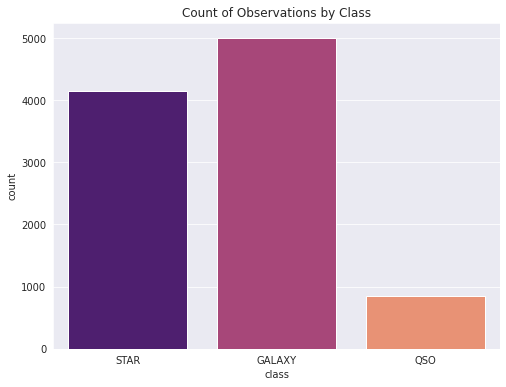

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
plt.title('Count of Observations by Class')
sns.countplot(sloan_survey['class'], palette = 'magma')

The figure above shows that our interest variable is unbalanced, since we have much more observations from GALAXY and STAR classes. 

\\

How our dependent varibale relates to "redshift".

Obs: Redshift - how much light of that celestial body is captured by the telescope.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

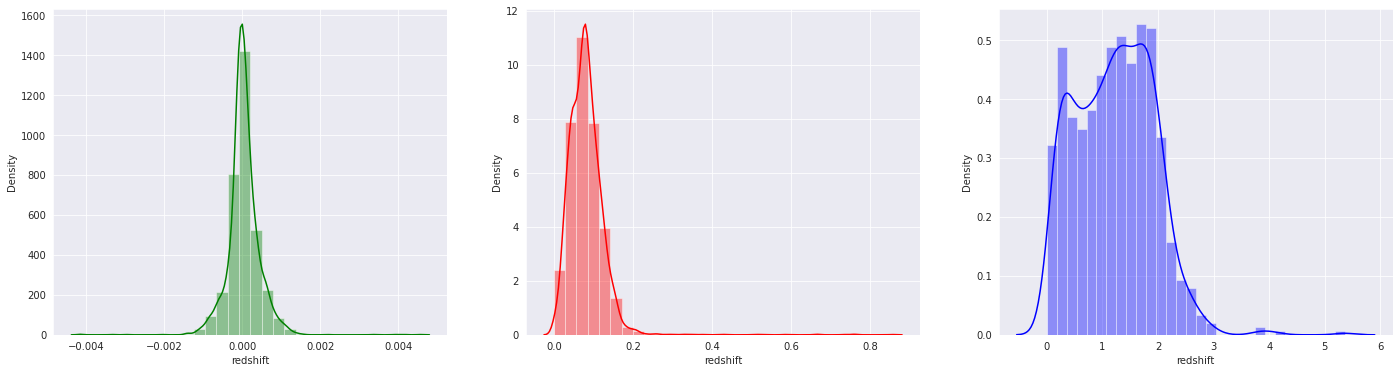

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.distplot(sloan_survey[sloan_survey['class'] == 'STAR'].redshift, ax = ax1, bins = 30, color = 'g')
sns.distplot(sloan_survey[sloan_survey['class'] == 'GALAXY'].redshift, ax = ax2, bins = 30, color = 'r')
sns.distplot(sloan_survey[sloan_survey['class'] == 'QSO'].redshift, ax = ax3, bins = 30, color = 'b')

\\

Correlation Matrix

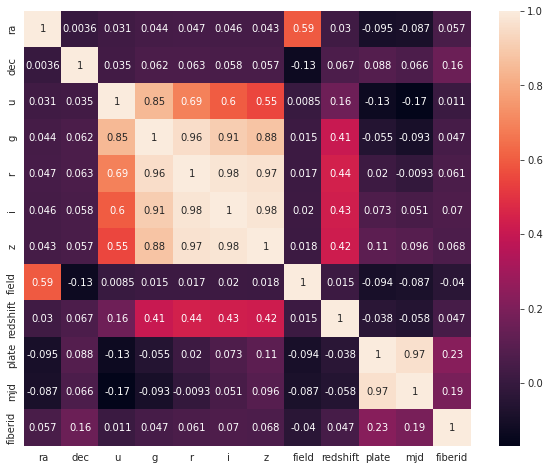

In [ ]:
corr = sloan_survey.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True)

\\
###V. Data Visualization: Univariate and Bivariate Analysis
\\

###Encoding Dependent Variable 

To be able to run the models, we will make an encoding of the dependent variable. From "object" let's change it to "int64".

In [ ]:
sloan_survey["class"].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [ ]:
sloan_survey['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [ ]:
sloan_survey.rename(columns = {'class':'Class'}, inplace = True)

In [ ]:
sloan_survey.Class = sloan_survey.replace(
    {"Class": {'STAR': 1, 
               'GALAXY': 2,
               'QSO': 3,
              }}                
                  ).Class 
sloan_survey  

,Class,ra,dec,u,g,r,i,z,field,redshift,plate,mjd,fiberid
0,1,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,267,-0.000009,3306,54922,491
1,1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,267,-0.000055,323,51615,541
2,2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,268,0.123111,287,52023,513
3,1,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,269,-0.000111,3306,54922,510
4,1,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,269,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,161,0.027583,447,51877,246
9996,2,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,162,0.117772,447,51877,228
9997,1,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,162,-0.000402,7303,57013,622
9998,2,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,163,0.014019,447,51877,229


In [ ]:
sloan_survey.info()
type(sloan_survey)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Class     10000 non-null  int64  
 1   ra        10000 non-null  float64
 2   dec       10000 non-null  float64
 3   u         10000 non-null  float64
 4   g         10000 non-null  float64
 5   r         10000 non-null  float64
 6   i         10000 non-null  float64
 7   z         10000 non-null  float64
 8   field     10000 non-null  int64  
 9   redshift  10000 non-null  float64
 10  plate     10000 non-null  int64  
 11  mjd       10000 non-null  int64  
 12  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 1015.8 KB


pandas.core.frame.DataFrame

### Selecting Features by applying Principal Component Analysis (PCA)
As we saw in the correlation map, features u, g, r, i, z are highly correlated. So we will use PCA to reduce from five resources to three and have better accuracy.



In [ ]:
from sklearn.decomposition import PCA 
#(based on: https://www.kaggle.com/code/sanchitvj/sdss-dr16-data-analysis/notebook)
pca = PCA(n_components = 3)
df_pca = pca.fit_transform(sloan_survey[['u', 'g', 'r', 'i', 'z']])

sloan_survey  = pd.concat((sloan_survey, pd.DataFrame(df_pca)), axis = 1)
sloan_survey .rename({0:'F1', 1:'F2', 2:'F3'}, axis = 1, inplace = True)
sloan_survey .drop(['u', 'g', 'r', 'i', 'z'], axis = 1, inplace = True)
sloan_survey 

,Class,ra,dec,field,redshift,plate,mjd,fiberid,F1,F2,F3
0,1,183.531326,0.089693,267,-0.000009,3306,54922,491,-1.507202,-1.377293,-0.265119
1,1,183.598370,0.135285,267,-0.000055,323,51615,541,-0.195758,-0.028410,-0.155695
2,2,183.680207,0.126185,268,0.123111,287,52023,513,1.297604,-0.590023,0.140338
3,1,183.870529,0.049911,269,-0.000111,3306,54922,510,-1.446117,0.566685,-0.009272
4,1,183.883288,0.102557,269,0.000590,3306,54922,512,-0.849271,1.287505,-0.397689
...,...,...,...,...,...,...,...,...,...,...,...
9995,2,131.316413,51.539547,161,0.027583,447,51877,246,0.222959,-0.134301,-0.057857
9996,2,131.306083,51.671341,162,0.117772,447,51877,228,0.259171,0.415333,0.158501
9997,1,131.552562,51.666986,162,-0.000402,7303,57013,622,1.480725,0.388717,-0.126646
9998,2,131.477151,51.753068,163,0.014019,447,51877,229,1.392088,0.117004,0.038818


\\

Spliting our df

In [ ]:
train_df, test_df = train_test_split(sloan_survey, test_size = 0.3, random_state = 7)
#train_df, val_df = train_test_split(train_df, test_size = 0.3, random_state = 7)
    #here we decided to not create the validation because after we will use only Grid Search for optimization

In [ ]:
# Checking for the size of our new datasets and if our splitting code worked 

# This step is important to see if the matrix that we will build to test the models 
# is correct

# Train dataset shape 
train_df.shape

(7000, 11)

In [ ]:
# Validation dataset shape
#val_df.shape

In [ ]:
# Test dataset shape
test_df.shape

(3000, 11)

In [ ]:
# Now, we will concat these dataframes in one (df) so we can apply all the transformations 
# at the same time to all the dataframes 

df = pd.concat((train_df.loc[:,'ra':'F3'],
             #   val_df.loc[:,'ra':'F3'],
                test_df.loc[:,'ra':'F3']))

In [ ]:
# Checking if everything went well when concating the data 

df.shape

(10000, 10)

Selecionar o conjunto de informações relevantes 

In [ ]:
X_train = df[:train_df.shape[0]]
#X_val = df[:val_df.shape[0]]
X_test = df[:test_df.shape[0]]
y_train = train_df.Class
#y_val = val_df.Class
y_test = test_df.Class

# B) Running Models 
* Decision Trees
* Random Forest 
* AdaBoost
* Gradient Boosting

### DECISION TREES


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# DECISION TREES

#Scikit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.tree import _tree

import warnings
warnings.simplefilter('ignore')

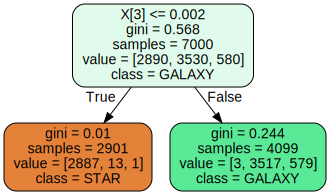

In [ ]:
# NAIVE 1: Decision tree with depth = 1 

dtc = tree.DecisionTreeClassifier(max_depth = 1)  
dtc_noprune = tree.DecisionTreeClassifier()

dtc.fit(X_train, y_train)
dtc_noprune.fit(X_train, y_train)

dot_data = tree.export_graphviz(dtc, out_file=None, 
                     class_names = ['STAR', 'GALAXY', 'QSO'],
                     filled=True, rounded=True) 

graph = graphviz.Source(dot_data) 
graph

In [ ]:
y_pred_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print("Accuracy", metrics.accuracy_score(y_test, y_pred_dtc))

Accuracy 0.458


In [ ]:
#we tried to compute like this, but we failed: 

#all_n_estimators = [50, 100, 250]
#all_max_depth = [1,2,3, 5,10, 25, 50]
#accuracy_list = []
#n_estimators_list = []
#max_depth_list = []

#for n_estimators in all_n_estimators:
 #   for max_depth in all_max_depth:
  #      print('n_estimators', n_estimators,
   #           'max_depth', max_depth )
              
    #    DTR = DecisionTreeRegressor(
     #       n_estimators=n_estimators,
      #      max_depth=max_depth
       #     ).fit(X_train, y_train)
        
        #pred = DTR.predict(X_val)
        
        #accuracy = metrics.accuracy_score(y_val, np.exp(pred))
        
        #accuracy_list.append(accuracy)
        #n_estimators_list.append(n_estimators)
        #max_depth_list.append(max_depth)           


In [ ]:
#results = pd.DataFrame({
#    'n_estimators': n_estimators_list,
#    'max_depth': max_depth_list,
#    'accuracy': accuracy_list
#})

#results

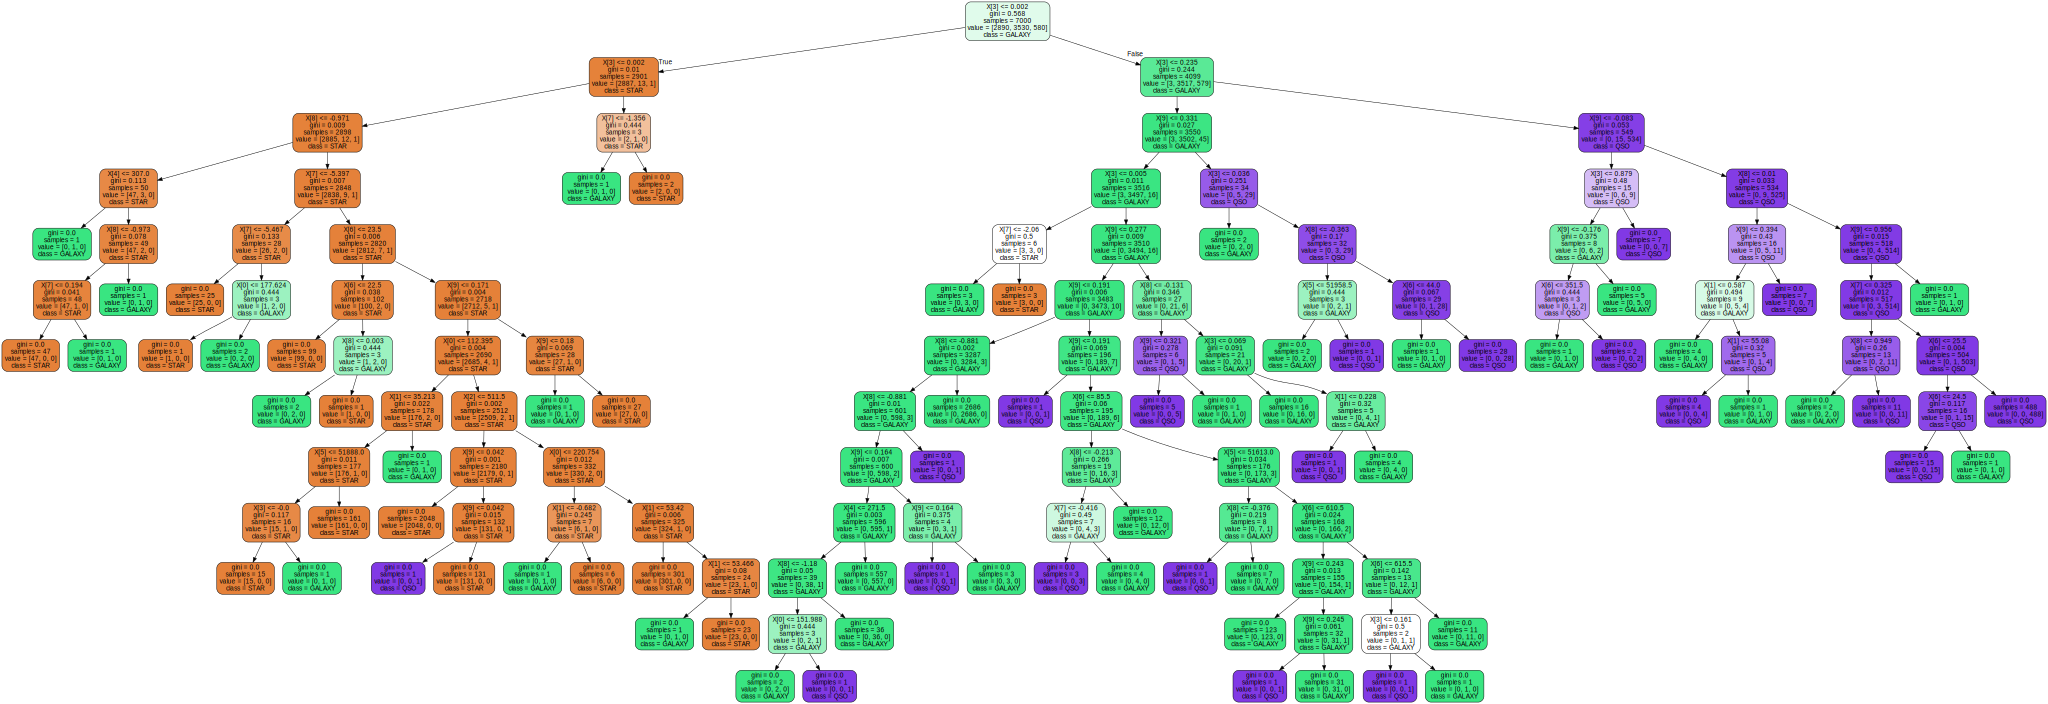

In [ ]:
# Model: Decision tree with depth = 10 

dtc = tree.DecisionTreeClassifier(max_depth = 100)  
dtc_noprune = tree.DecisionTreeClassifier()

dtc.fit(X_train, y_train)
dtc_noprune.fit(X_train, y_train)

dot_data = tree.export_graphviz(dtc, out_file=None, 
                     class_names = ['STAR', 'GALAXY', 'QSO'],
                     filled=True, rounded=True) 

graph = graphviz.Source(dot_data) 
graph

In [ ]:
y_pred_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print("Accuracy", metrics.accuracy_score(y_test, y_pred_dtc))

Accuracy 0.424


In [ ]:
# based on https://www.kaggle.com/code/pruthviacharya1/decision-tree-classifier-with-99-3-accuracy 

from sklearn.model_selection import GridSearchCV
#Finding the best parameters 

#Seperating the target variable "class" from the set of the dataset 
X = sloan_survey.drop('Class',axis=1) 
y = sloan_survey['Class']

parameters_list = {'max_depth':np.arange(1,11),'min_samples_leaf':np.arange(2,10)},
all_decision_trees = GridSearchCV(DecisionTreeClassifier(),parameters_list)
all_decision_trees.fit(X,y)

#Using the best parameters
y_pred = all_decision_trees.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.4236666666666667


Our naive model has performed better than depth = 10. 

### RANDOM FOREST

In [ ]:
# From: https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100) 
#testar para estimadores diferentes, alem de 100
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred_rf = clf.predict(X_test)
 
# using metrics module for accuracy calculation
print("Accuracy", metrics.accuracy_score(y_test, y_pred_rf))

# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)


Accuracy 0.424


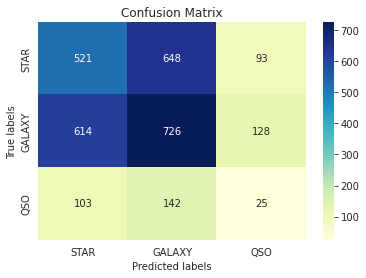

In [ ]:
# Now, lets check our Confusion Matrix for Random Forest

labels = ['STAR', 'GALAXY', 'QSO']

ax= plt.subplot()
sns.heatmap(cm_rf, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [ ]:
# Optimizing hyperparameters:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune

##rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores


##rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model

##rf_random.fit(X_train, y_train)

In [ ]:
#rf_random.best_params_

#our best model was:

### ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# From:https://www.datacamp.com/tutorial/adaboost-classifier-python

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_adb = model.predict(X_test)


In [ ]:
# Computing model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_adb))

Accuracy: 0.402


In [ ]:
# Confusion Matrix
cm_adb = confusion_matrix(y_test, y_pred_adb)

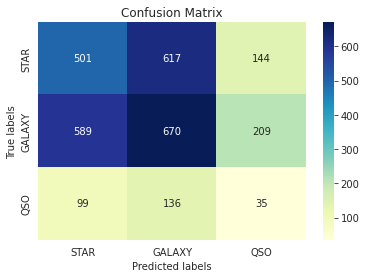

In [ ]:
#Now, lets check our Confusion Matrix for AdaBoost

labels = ['STAR', 'GALAXY', 'QSO']
ax= plt.subplot()
sns.heatmap(cm_adb, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [ ]:
#Using grid search to optimize hyperparameters:
#based on: https://machinelearningmastery.com/adaboost-ensemble-in-python/


from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
# define the model with default hyperparameters
model = AdaBoostClassifier()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [ ]:
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(X_train, y_train)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.920333 using {'learning_rate': 0.01, 'n_estimators': 500}


In [ ]:
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


0.914286 (0.001952) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.914286 (0.001952) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.914286 (0.001952) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.914286 (0.001952) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.914286 (0.001952) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.914286 (0.001952) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.914286 (0.001952) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.914286 (0.001952) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.914286 (0.001952) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.914333 (0.001898) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.914429 (0.001704) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.920333 (0.011715) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.914476 (0.001720) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.919571 (0.011067) with: {'learning_rate': 0.1, 'n_estimators': 50}
0.91

####Best model for Adaboost:
0.914286 (0.001952) with: {'learning_rate': 0.0001, 'n_estimators': 10}

### GRADIENT BOOSTING 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train_scale, y_train, random_state=0)

In [ ]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train_sub, y_train_sub)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_sub, y_train_sub)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test_sub, y_test_sub)))
    

Learning rate:  0.05
Accuracy score (training): 0.967
Accuracy score (validation): 0.965
Learning rate:  0.1
Accuracy score (training): 0.981
Accuracy score (validation): 0.982
Learning rate:  0.25
Accuracy score (training): 0.990
Accuracy score (validation): 0.988
Learning rate:  0.5
Accuracy score (training): 0.994
Accuracy score (validation): 0.989
Learning rate:  0.75
Accuracy score (training): 0.834
Accuracy score (validation): 0.821
Learning rate:  1
Accuracy score (training): 0.991
Accuracy score (validation): 0.986


####Best model for Gradient Boosting:
Learning rate:  0.5 \
Accuracy score (training): 0.994 \
Accuracy score (test): 0.989

\
Feature Importance


In [ ]:
import time

from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(df.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
from sklearn.inspection import permutation_importance

In [ ]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.014 seconds


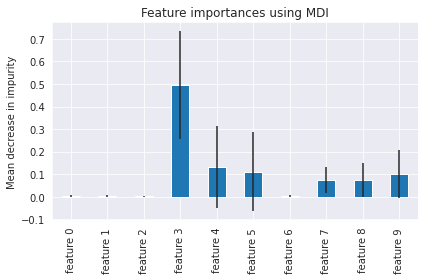

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 2.714 seconds


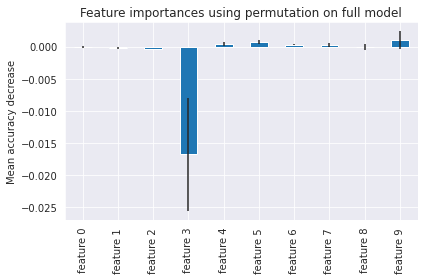

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
df.info()
type(df)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2317 to 3582
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   field     10000 non-null  int64  
 3   redshift  10000 non-null  float64
 4   plate     10000 non-null  int64  
 5   mjd       10000 non-null  int64  
 6   fiberid   10000 non-null  int64  
 7   F1        10000 non-null  float64
 8   F2        10000 non-null  float64
 9   F3        10000 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 859.4 KB


pandas.core.frame.DataFrame

\\

##OUR CHOSEN MODEL:

###GRADIENT BOOSTING

Learning rate:  0.5

Accuracy score (training): 0.994

Accuracy score (test): 0.989

Features more important were redshift, mjd, and F9.

### EXERCICIO 3 - DATA VISUALIZATION DASHBOARD 

In [ ]:
from google.colab import files
uploaded = files.upload()
equipment = pd.read_csv(io.BytesIO(uploaded['russia_losses_equipment.csv']))
equipment.head()

Saving russia_losses_equipment.csv to russia_losses_equipment.csv


,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import files
uploaded = files.upload()
personnel = pd.read_csv(io.BytesIO(uploaded['russia_losses_personnel.csv']))
personnel.head()

Saving russia_losses_personnel.csv to russia_losses_personnel.csv


,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


### GENERAL INFORMATION 

In [ ]:
# Shape equipment
equipment.shape

(102, 18)

In [ ]:
# Shape personnel
personnel.shape

(102, 5)

Since both dfs regards the same event, we will merge both informations

In [ ]:
df = equipment.merge(personnel,how='left',left_on=["date","day"],right_on=["date","day"])

In [ ]:
df

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,...,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction,personnel,personnel*,POW
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,...,2,0,NaN,NaN,NaN,NaN,NaN,2800,about,0
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,...,2,0,NaN,NaN,NaN,NaN,NaN,4300,about,0
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,...,2,0,NaN,NaN,NaN,NaN,NaN,4500,about,0
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,...,2,5,NaN,NaN,NaN,NaN,NaN,5300,about,0
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,...,2,7,NaN,NaN,NaN,NaN,NaN,5710,about,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2022-06-02,99,210,175,1363,3354,661,207,NaN,NaN,...,13,95,51.0,NaN,2325.0,120.0,Bakhmut,30850,about,498
98,2022-06-03,100,210,175,1367,3366,675,207,NaN,NaN,...,13,95,51.0,NaN,2329.0,121.0,Bakhmut,30950,about,498
99,2022-06-04,101,210,175,1376,3379,680,207,NaN,NaN,...,13,95,52.0,NaN,2337.0,122.0,Zaporizhzhia,31050,about,498
100,2022-06-05,102,210,175,1381,3392,686,207,NaN,NaN,...,13,95,53.0,NaN,2360.0,122.0,Bakhmut,31150,about,498


###DATA PREP

Inspired on: https://www.kaggle.com/code/tomasborges/2022-russian-invasion-of-ukraine-eda-forecast

In [ ]:
# Lest first check for missing values in our dataset, visualizing the percentage 
# of NaN in each variable. 

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
greatest losses direction,89,87.254902
mobile SRBM system,66,64.705882
cruise missiles,65,63.725490
vehicles and fuel tanks,65,63.725490
military auto,37,36.274510
fuel tank,37,36.274510
special equipment,19,18.627451
date,0,0.000000
anti-aircraft warfare,0,0.000000
personnel*,0,0.000000


In [ ]:
# Drop variables with over 60% of missing values
df.drop(labels= ['personnel*','greatest losses direction','mobile SRBM system','cruise missiles','vehicles and fuel tanks'],axis=1, inplace=True)

In [ ]:
#The equipment data has missing values we need to treat
#the personnel data has a column with little to no value: 'personnel*'

#changing 'date' type to datetime for our timeseries study
df['date'] = pd.to_datetime(df['date'])


#fill na (missing values)
df.fillna(value=0, inplace=True)

### SOME BASIC FEATURE ENGINEERING 

#### Incremental Personel Loss
Since we have personnel losses are cumulative, we are adding a column with daily/incremental personnel losses

In [ ]:
df['incremental_personnel_loss'] = df['personnel'].diff(periods=1)

#setting day 1
df['incremental_personnel_loss'] = df['incremental_personnel_loss'].replace(df['incremental_personnel_loss'][0],df['personnel'][0])

Week and Month Variables 

In [ ]:
df['month'] = df['day']//30
df['week'] = df['day']//7

In [ ]:
print(df["month"].unique()) # 4 months
print(df["week"].unique()) # 15 weeks

[0 1 2 3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


\\

### VISUALIZATIONS 
\\

Attempt 1: Dashboard 
\\
We were not abble to run the code for our dashboard visualization.  In the last code chuck we received an Error Message saying "syntax error" in the following line: col1, col2= st.columns(2).  

In [ ]:
#pip install streamlit

In [ ]:
#import time 
#import numpy as np  
#import pandas as pd  
#import plotly.express as px  
#import streamlit as st  

In [ ]:
#st.set_page_config(
#    page_title = 'Russian-Ukranian War Dashboard',
#    page_icon = '🇺🇦',
#    layout = 'wide'
#)

In [ ]:
# dashboard title

#st.title("Russian-Ukranian War Dashboard - 2022")

In [ ]:
# top-level filters
#month_filter = st.selectbox("Select the Month", pd.unique(df["month"]))

In [ ]:
# creating a single-element container.
#placeholder = st.empty()

# dataframe filter (here we would be able to filter/visualize data by month)

#df = df[df['month']==month_filter]

In [ ]:
# Code for the dashboard itself:  

#for month in range(15):
#    while True: 
    
#        df['personnel)new'] = df['personnel'] * np.random.choice(range(1,5))
#        df['POW_new'] = df['POW'] * np.random.choice(range(1,5))

    # creating KPIs 
#    avg_personnel = np.mean(df['personnel']) 

#    count_pow = int(df[(df["POW"]=='POW')]['POW'].count() + np.random.choice(range(1,30)))

#    count_artillery = int(df[(df["field artillery"]=='field artillery')]['field artillery'].count() + np.random.choice(range(1,30)))
  

#   with placeholder.container():
        # create three columns
#        kpi1, kpi2= st.columns(2)

        # fill in those three columns with respective metrics or KPIs 
#        kpi1.metric(label="Avarege Personnel", value=round(avg_personnel), delta= round(avg_personnel) - 10)
#        kpi2.metric(label="Count of Prisioners of War", value= int(POW, delta= - 10 + POW)
       

    # create two columns for charts 
              
#    col1, col2= st.columns(2)
#        with col1:
#            st.markdown("Total Count of Personnel Losses by Week")
#            fig = px.bar(data_frame=df, y = 'personnel', x = 'week')
#            st.write(col1)
#        with col2:
#            st.markdown("Total Count of Personnel Losses by Week")
#            fig2 = px.bar(data_frame=df, y = 'military auto', x = 'week')
#            st.write(fig_c2)
                    
#    st.markdown("### Detailed Data View")
#    st.dataframe(df)
                    
#    time.sleep(1)

\\

TO OVERCOME OUR PROBLEM WITH THE DASHBOARD WE WILL RELY ON A BASIC VISUALIZATION ANALYSIS. 

In [ ]:
import matplotlib.dates as mdates
from scipy.stats import pearsonr

Text(0.5, 1.0, 'Cumulative Personnel losses')

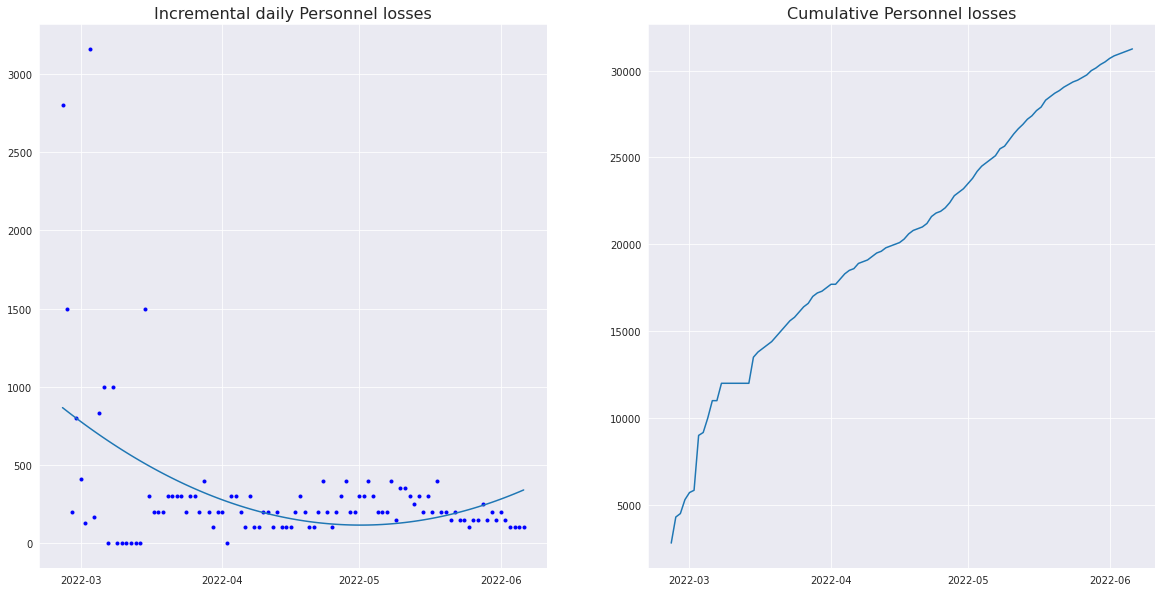

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].plot(df['date'], df['incremental_personnel_loss'], "b.")
axes[1].plot(df['date'], df['personnel'])

for ax in axes:
    ax.xaxis.set_minor_locator(mdates.DayLocator(bymonthday=[25], interval=1, tz=None))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.grid(True)

    
#adding a trendline to personnel losses
z = np.polyfit(mdates.date2num(df['date']), df['incremental_personnel_loss'], 3)
p = np.poly1d(z)
axes[0].plot(mdates.date2num(df['date']),p(mdates.date2num(df['date'])))

axes[0].set_title('Incremental daily Personnel losses', fontsize = 16)
axes[1].set_title('Cumulative Personnel losses', fontsize = 16)

Graphs one and two shwo that there is a signifficant increase in deaths in the first half of the war. After hiting a cummulative loss of 12000, there is a stabilization of fatalities. 

PERSONNEL LOSS BY WEEK

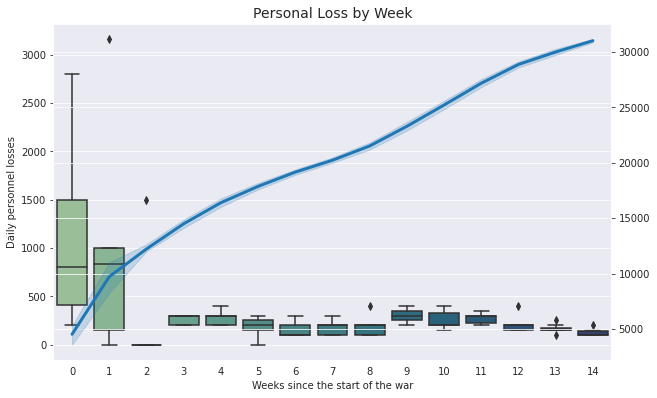

In [ ]:
fig,ax1 = plt.subplots(figsize= (10,10*0.618))


bp = sns.boxplot(data = df, 
                     x = "week", 
                     y = "incremental_personnel_loss",
                     palette="crest",
                     ax = ax1)

ax2 = ax1.twinx()

lp = sns.lineplot(data = df, 
                     x = "week", 
                     y = "personnel",
                     linewidth = 3,
                     ax=ax2)
ax1.set(xlabel='Weeks since the start of the war', ylabel='Daily personnel losses')
ax2.set(ylabel='')
ax1.set_title("Personal Loss by Week", fontsize = 14);

As we have argued on the first and second figures, there was a significant ammount of fatalities in the first two weeks of war. More precisely, only on the second week russia lost over 3000 people. 

PRISIONERS OF WAR (POW)

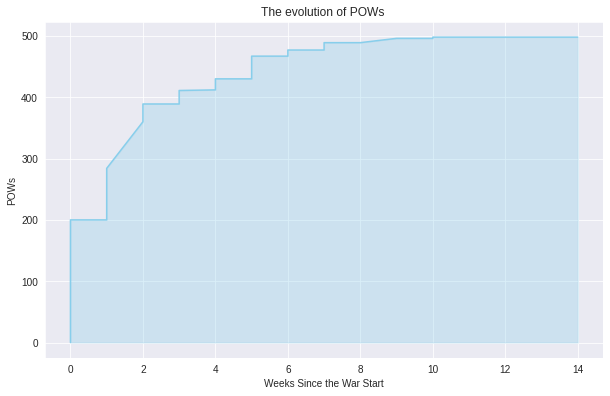

In [ ]:
fig,ax = plt.subplots(figsize= (10,10*0.618))

# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Make the same graph
ax.fill_between(df["week"], df["POW"], color="skyblue", alpha=0.3)
ax.plot(df["week"], df["POW"], color="skyblue")

#getting correlation with personnel losses
corr, _ = pearsonr(df["POW"], df['personnel'])
Pearsons_correlation = 'Pearsons correlation: %.3f' % corr

# Add titles
plt.title(f"The evolution of POWs ", fontsize=12)
plt.xlabel("Weeks Since the War Start")
plt.ylabel("POWs")

# Show the graph
plt.show()

Prisioners of war tendencies also behaves similarly to personnel losses with a Pearsons Correlation of 0.825. As most POWs were captured in the first 4 weeks of the war and most losses happened on the first couple of weeks. 

EQUIPMENT LOSSES 

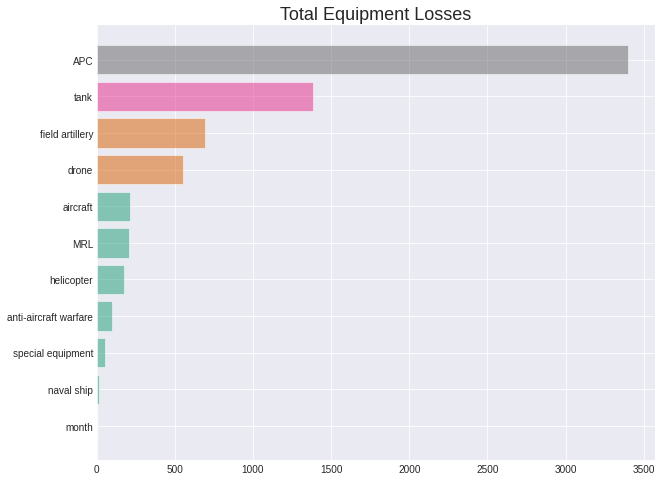

In [ ]:
ig,ax = plt.subplots(figsize= (10,8))

#getting the proper df with columns sorted by the last row, we also drop the columnds that were merged into "vehicles and fuel tanks"
df_bar = df.loc[:, ~df.columns.isin(['date', 'day', 'week', 'personnel', 'POW', 'incremental_personnel_loss','military auto', 'fuel tank', 'mobile SRBM system'])].sort_values(by=len(df.index)-1, axis=1)

#It's important to properly capture the data we want before plotting
x = df_bar.columns.values

#we want an array and not index, also we removed irrelevant columns
y = df_bar.tail(1).squeeze().values

#we get the values of the last day to give us the most recent losses

#adding a color map
my_cmap = plt.get_cmap("Dark2")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

#plotting
ax.barh(x, y, align = 'center', alpha=0.5, color = my_cmap(rescale(y)))
ax.set_title('Total Equipment Losses', fontsize=18)

plt.show()

If we analyse the equiment losses, Armored Personnel Carrier (APC) is the item which has been more affected. We believe this happens because the total count of APC that belongs to the Russian Army is greater than naval ships or aircrafts, for example. In this sense, a better metric would be to compare the propostional loss, considering the losses relation to the total count of a given equipment.  

AIR EQUIPMENT LOSSES 

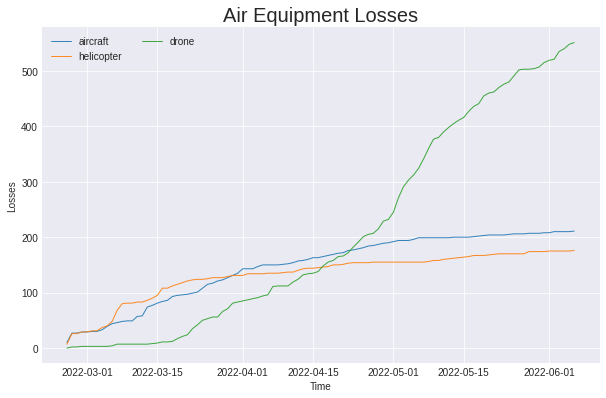

In [ ]:
# Plot multiple lines
fig, ax = plt.subplots(figsize= (10,10*0.618))

num=0
for column in df[['aircraft', 'helicopter', 'drone']]:
    num+=1
    plt.plot(df['date'], df[column], marker='', linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Air Equipment Losses", fontsize=20)
plt.xlabel("Time")
plt.ylabel("Losses")

# Show the graph
plt.show()



We believe in two hypothesis about drones being the most lost air equipment: 

* H_1: we proportionally have more drone than other air equipments. 
* H_2: Drones are easier targets to hit. 

Unfortunately, since our data regards only losses, we cannot test any of the hypothesis. 